<a href="https://colab.research.google.com/github/dzeko5959/AI/blob/main/ML/UDEM/A2_1_Seunghyeon_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import the CSV file**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving A1.4 Vino Tinto.csv to A1.4 Vino Tinto.csv


In [ ]:
import pandas as pd

df = pd.read_csv("A1.4 Vino Tinto.csv")
print(df.head())

   acidezFija  acidezVolatil  acidoCitrico  azucarResidual  cloruros  \
0         7.4           0.70          0.00             1.9     0.076   
1         7.8           0.88          0.00             2.6     0.098   
2         7.8           0.76          0.04             2.3     0.092   
3        11.2           0.28          0.56             1.9     0.075   
4         7.4           0.70          0.00             1.9     0.076   

   dioxidoAzufreLibre  dioxidoAzufreTotal  densidad    pH  sulfatos  alcohol  \
0                11.0                34.0    0.9978  3.51      0.56      9.4   
1                25.0                67.0    0.9968  3.20      0.68      9.8   
2                15.0                54.0    0.9970  3.26      0.65      9.8   
3                17.0                60.0    0.9980  3.16      0.58      9.8   
4                11.0                34.0    0.9978  3.51      0.56      9.4   

   calidad  
0        5  
1        5  
2        5  
3        6  
4        5  


Set more than 6 points for good wine.
This is because the data balance is relatively better because there are a total of 855 types of 6 points or more and 764 types of 5 points or less.

In [ ]:
df["calidad_binaria"] = (df["calidad"] >= 6).astype(int)
df.drop(columns=["calidad"], inplace=True)
print(df["calidad_binaria"].value_counts(normalize=True))

calidad_binaria
1    0.534709
0    0.465291
Name: proportion, dtype: float64


**2. Data segmentation**

In [ ]:
X = df.drop(columns=["calidad_binaria"])
y = df["calidad_binaria"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set : \n", y_train.value_counts(normalize=True))
print("Test Set : \n", y_test.value_counts(normalize=True))

Training Set : 
 calidad_binaria
1    0.534793
0    0.465207
Name: proportion, dtype: float64
Test Set : 
 calidad_binaria
1    0.534375
0    0.465625
Name: proportion, dtype: float64


**3. Cross validation**

Learn with logistic regression model, and use K-Fold Cross-Validation to measure the average accuracy of the model.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Cross-Verification Mean Accuracy: {:.4f}".format(cv_scores.mean()))
print("Cross-validation accuracy standard deviation: {:.4f}".format(cv_scores.std()))

Cross-validation accuracy scores: [0.78125    0.7421875  0.71875    0.73828125 0.72941176]
Cross-Verification Mean Accuracy: 0.7420
Cross-validation accuracy standard deviation: 0.0212


**4. Model training and performance evaluation**

The model is trained using training data, and predictions are performed with test data to generate probability vectors.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

thresholds = [0.5, 0.6, 0.4]

for threshold in thresholds:
    print(f"\n== thresholds: {threshold} ==")
    y_pred = (y_prob >= threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print("Confusion matrix:\n", cm)


== thresholds: 0.5 ==
Accuracy: 0.7531
Sensitivity: 0.7427
Specificity: 0.7651
Confusion matrix:
 [[114  35]
 [ 44 127]]

== thresholds: 0.6 ==
Accuracy: 0.7469
Sensitivity: 0.6491
Specificity: 0.8591
Confusion matrix:
 [[128  21]
 [ 60 111]]

== thresholds: 0.4 ==
Accuracy: 0.7562
Sensitivity: 0.8421
Specificity: 0.6577
Confusion matrix:
 [[ 98  51]
 [ 27 144]]


An accuracy standard deviation of 0.0212 means that the results of the cross-validation are relatively consistent.

**5. ROC curve and AUC**

ROC curves are drawn to evaluate the performance of the model, and AUC is calculated.

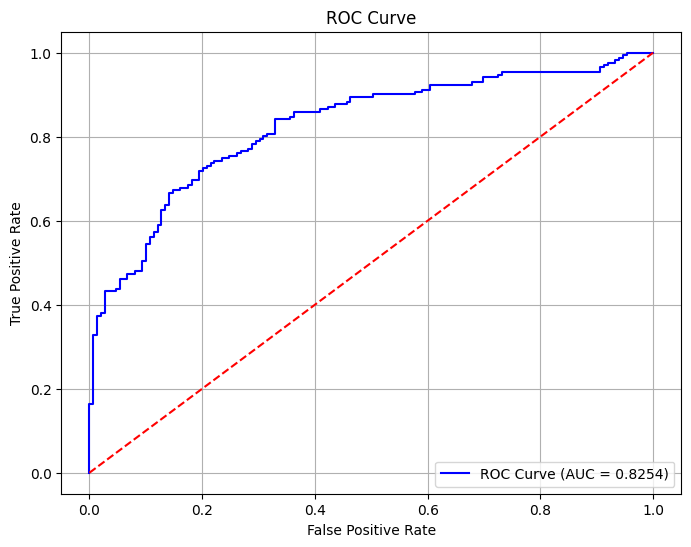

AUC: 0.8254


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC: {roc_auc:.4f}")

An AUC value of 0.8254 can be determined that the current model has a decent classification ability.

**6. Interpretation of results**

Calculate the regression coefficients output by the model, and see how each feature affects the results.

In [ ]:
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
})

coefficients["Abs Coef"] = coefficients["Coeficiente"].abs()
coefficients = coefficients.sort_values(by="Abs Coef", ascending=False)

print(coefficients[["Variable", "Coeficiente"]])

              Variable  Coeficiente
1        acidezVolatil    -2.792153
9             sulfatos     2.123551
4             cloruros    -1.023449
10             alcohol     0.890874
2         acidoCitrico    -0.886794
8                   pH    -0.364108
0           acidezFija     0.091033
3       azucarResidual     0.043052
5   dioxidoAzufreLibre     0.028039
7             densidad    -0.026048
6   dioxidoAzufreTotal    -0.017712


AcidezVolatil, sulfatos have big impacts on wine quality.